모듈 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

EDA

In [3]:
df1=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv") 

In [4]:
df1.columns # 변수 파악

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

변수 분석
- Diabetes_binary: 당뇨병 여부 (0 = 당뇨병 없음, 1 = 당뇨병 있음)
- HighBP: 의사, 간호사 또는 기타 건강 전문가에게 고혈압 진단을 받은 성인 (0 = 아님, 1 = 고혈압 있음)
- HighChol: 의사, 간호사 또는 기타 건강 전문가에게 고콜레스테롤 진단을 받은 적이 있는지 여부 (0 = 아님, 1 = 있음)
- CholCheck: 지난 5년 내에 콜레스테롤 검사를 받았는지 여부 (0 = 받지 않음, 1 = 받음)
- BMI: 체질량 지수 (BMI)
- Smoker: 평생 동안 담배를 100개비 이상 피웠는지 여부 (0 = 아님, 1 = 있음) [참고: 5갑 = 100개비]
- Stroke: 의사에게 뇌졸중 진단을 받은 적이 있는지 여부 (0 = 아님, 1 = 있음)
- HeartDiseaseorAttack: 관상동맥질환(CHD) 또는 심근경색(MI)을 보고한 적이 있는 응답자 (0 = 아님, 1 = 있음)
- PhysActivity: 지난 30일 동안 직장 외의 신체 활동 또는 운동을 했는지 여부 (0 = 안 함, 1 = 함)
- Fruits: 하루에 과일을 한 번 이상 섭취하는지 여부 (0 = 안 함, 1 = 함)
- Veggies: 하루에 채소를 한 번 이상 섭취하는지 여부 (0 = 안 함, 1 = 함)
- HvyAlcoholConsump: 과음자 (성인 남성 주 14회 이상, 성인 여성 주 7회 이상 음주) (0 = 아님, 1 = 있음)
- AnyHealthcare: 건강 보험이나 사전 의료 계획(HMO 등), 정부 의료 보험(Medicare, 인디언 건강 서비스 등)이 있는지 여부 (0 = 없음, 1 = 있음)
- NoDocbcCost: 지난 12개월 동안 비용 문제로 인해 의사 진료를 받지 못한 적이 있는지 여부 (0 = 아님, 1 = 있음)
- GenHlth: 일반적인 건강 상태 (1 = 매우 좋음 ~ 5 = 매우 나쁨)
- MentHlth: 지난 30일 동안 정신 건강이 좋지 않았던 날 수 (0 ~ 30일)
- PhysHlth: 지난 30일 동안 신체 건강이 좋지 않았던 날 수 (0 ~ 30일)
- DiffWalk: 걷거나 계단을 오르는 데 심각한 어려움이 있는지 여부 (0 = 아님, 1 = 있음)
- Sex: 응답자의 성별 (0 = 여성, 1 = 남성)
- Age: 14단계 연령 구분 (1 ~ 14) (1:18-24세 2:25-29세 3:30-34세 4:35-39세 5:40-44세 6:45-49세 7:50-54세 ... 13:80-84세 14:85세 이상)
- Education: 가장 높은 학력 또는 학교를 마친 연도 (1 = 초등학교 ~ 6 = 대학 졸업 이상)
- Income: 연간 가구 소득 수준 (1 ~ 8) (응답 거부 시 "Refused"로 기록) $10,000 이하  
(1:$10,000 - $15,000, 2:$15,000 - $20,000, 3:$20,000 - $25,000, 4:$25,000 - $35,000, 5:$35,000 - $50,000, 6:$50,000 - $75,000, 7:$75,000 이상)

In [5]:
df1.nunique() # 변수들의 고유값을 파악함으로써 이상치가 있는지 간략하게 확인

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [6]:
# 데이터 분포 파악
df1.describe().transpose 

<bound method DataFrame.transpose of        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.00000

In [7]:
# 데이터 정제 -결측치 파악 및 제거
df1.info()
print(df1.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

##### 결측치 파악결과 결측치가 없음을 확인할 수 있음.

In [8]:
# 데이터 정제 - 이상치 파악-> describe에서 최대값 최소값의 확인 결과 BMI만 확인해보면 된다고 생각됌.
print("BMI 최대값: ",max(df1['BMI']))
print("BMI 최소값: ",min(df1['BMI']))
print(df1['BMI'].value_counts(ascending=False))

BMI 최대값:  98.0
BMI 최소값:  12.0
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64


BMI = 체중(KG)/(신장(m)^2)으로, 80이 넘으려면 키가 만약 180인 경우 259.2kg이상이어야 한다.  
즉 BMI지수가 80근처라는 건 인간의 몸무게가 약 180kg에서 260kg 사이라고 볼 수 있는데,  
이건 상식적으로 받아들이기 힘든 수준으로 이상치가 있다고 판단이 됌.

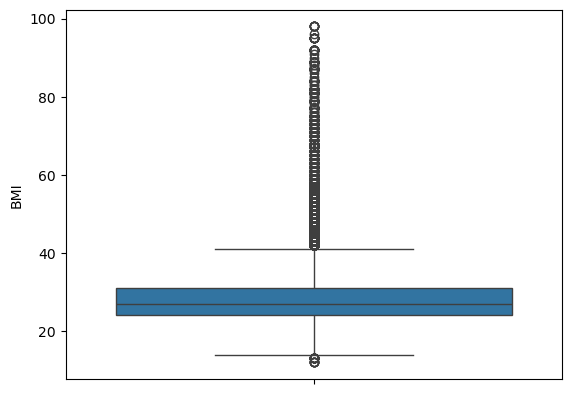

In [13]:
# 데이터 정제 - box plot을 이용한 이상치 제거 
sns.boxplot(df1['BMI'])
Q1 = df1['BMI'].quantile(0.25)
Q3 = df1['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1_cleanbmi = df1[(df1['BMI'] >= lower_bound) & (df1['BMI'] <= upper_bound)]

In [14]:
# 이상치 제거된 데이터셋 확인
print(df1_cleanbmi.describe().transpose)

<bound method DataFrame.transpose of        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    243833.000000  243833.000000  243833.000000  243833.000000   
mean          0.131151       0.420140       0.422027       0.962187   
std           0.337566       0.493582       0.493884       0.190744   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  243833.000000  243833.000000  243833.000000         243833.000000   
mean       27.569492       0.443398       0.040122              0.093039   
std         4.964920       0.496787       0.196245              0.290488   
min        14.00000

---

In [15]:
# 변수 간의 상관관계 파악을 위한 데이터 분할 
X = df1_cleanbmi.drop('Diabetes_binary', axis=1)  # 예: 독립 변수들
y = df1_cleanbmi['Diabetes_binary']  # 종속 변수 (당뇨병 여부)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

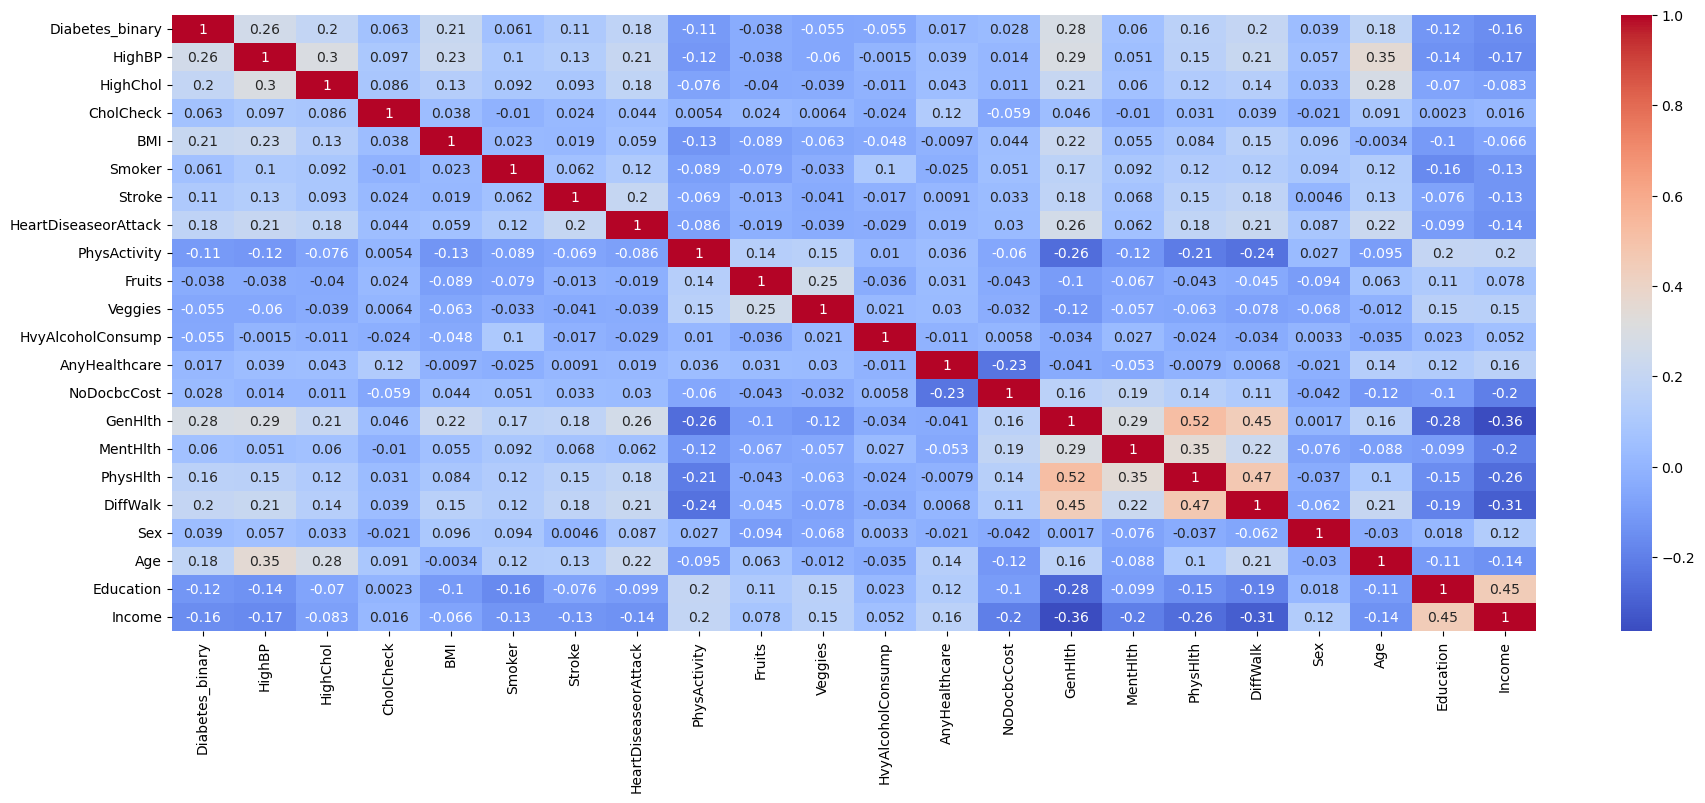

                 Feature       VIF
0                 HighBP  1.333338
1               HighChol  1.177201
2              CholCheck  1.032807
3                    BMI  1.131903
4                 Smoker  1.093306
5                 Stroke  1.081513
6   HeartDiseaseorAttack  1.172113
7           PhysActivity  1.149062
8                 Fruits  1.112087
9                Veggies  1.111795
10     HvyAlcoholConsump  1.024311
11         AnyHealthcare  1.112638
12           NoDocbcCost  1.141642
13               GenHlth  1.771344
14              MentHlth  1.229112
15              PhysHlth  1.603165
16              DiffWalk  1.498239
17                   Sex  1.080009
18                   Age  1.349111
19             Education  1.328178
20                Income  1.496158


In [16]:
# 변수 간의 다중공선성 문제 확인
# 상관관계 히트맵
plt.figure(figsize=(22, 8))
sns.heatmap(df2_cleanbmi.corr(), annot=True, cmap='coolwarm')
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 데이터를 표준화하여 다중공선성 확인 준비
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# VIF 결과 확인
print(vif_data)

일반적으로 VIF 값이 10 이상이면 다중공선성이 높다고 판단하여 해당 변수를 제거하거나 조정하는 것을 고려,  
확인 결과 10이상인 VIF가 존재하지 않음.

In [32]:
# 로지스틱 회귀모형 회귀계수들의 유의성 확인
X1 = df1_cleanbmi.drop(columns=['Diabetes_binary'])  # 예시: 종속 변수를 제외한 독립 변수들
y1= df1_cleanbmi['Diabetes_binary']  # 종속 변수 (당뇨병 유무)

# 상수항 추가
X1 = sm.add_constant(X1)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y1, X1)
result = model.fit()

# 결과 요약 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.307763
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               243833
Model:                          Logit   Df Residuals:                   243811
Method:                           MLE   Df Model:                           21
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.2080
Time:                        11:39:14   Log-Likelihood:                -75043.
converged:                       True   LL-Null:                       -94746.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.8588      0.102    -86.890      0.000      -9.059      -8.659

로지스틱 회귀 모델을 생성하여 회귀계수들을 확인 해본 결과  
smoker(평생 동안 담배를 100개비 이상 피웠는지 여부)변수와 NoDocbcCost(지난 12개월 동안 비용 문제로 인해 의사 진료를 받지 못한 적이 있는지 여부)의  
p-value값이 0.05보다 크므로 통계적으로 유의하지 않음을 확인할 수 있다.

In [ ]:
# 로지스틱 회귀 예측 모델 생성
model = LogisticRegression(max_iter=1000)  # max_iter은 경사 하강법과 같은 최적화 알고리즘이 허용된 최대 반복 횟수
model.fit(X_train, y_train)  # 모델 학습
# 모델 평가
y_pred = model.predict(X_test) # 테스트데이터에 대한 예측값
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100)) # 정확도
print("Confusion Matrix:\n", conf_matrix) # confusion matrix
print("Classification Report:\n", class_report) # 결과 보고서

Accuracy: 87.21%
Confusion Matrix:
 [[41619   815]
 [ 5423   910]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     42434
         1.0       0.53      0.14      0.23      6333

    accuracy                           0.87     48767
   macro avg       0.71      0.56      0.58     48767
weighted avg       0.84      0.87      0.84     48767



모델의 정확도는 87.21% 정도로, 클래스 0(당뇨병 없음)에 대한 정밀도는 0.88, 재현율은 0.98로 클래스 0에 대해서는 높은 예측 성능을 보인다.  
하지만 클래스 1(당뇨병 있음)에 대한 정밀도는 0.53, 재현율은 0.14로 클래스 1에 대해서는 낮은 예측 성능을 보여준다.  
이는 클래스 불균형때문의 문제로 생각됌 (by https://rimicode.tistory.com/195)

In [18]:
# 클래스 파악
df1_cleanbmi['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    211854
1.0     31979
Name: count, dtype: int64

파악 결과 클래스0과 클래스1의 비율이 약 6.62:1로 클래스 불균형이 존재한다.  
따라서 클래스 불균형 문제를 해결하기 위해 적은 클래스 1에 가중치를 주어 모델을 다시 만들 필요가 있음.  
여기서 가중치를 준다는 의미는 손실 함수에 클래스 가중치를 곱해준다는 뜻임.

In [19]:
# 클래스 불균형을 고려한 로지스틱 회귀모형 생성
model = LogisticRegression(class_weight='balanced', max_iter=1000) # class_weight 옵션을 주어 가중치 조절
model.fit(X_train, y_train)  # 모델 학습
# 모델 평가
y_pred = model.predict(X_test) # 테스트데이터에 대한 예측값
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100)) # 정확도
print("Confusion Matrix:\n", conf_matrix) # confusion matrix
print("Classification Report:\n", class_report) # 결과 보고서

Accuracy: 72.65%
Confusion Matrix:
 [[30573 11861]
 [ 1475  4858]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     42434
         1.0       0.29      0.77      0.42      6333

    accuracy                           0.73     48767
   macro avg       0.62      0.74      0.62     48767
weighted avg       0.87      0.73      0.77     48767



클래스에 가중치를 주어 모델을 다시 생성하여 학습 시킨 결과  
정확도는 72.65%이고, 클래스 0에 대한 정밀도는 0.95, 재현율은 0.72로 클래스 0에 대해서는 좋은 예측 성능을 보인다.  
클래스 1에 대한 정밀도는 0.29, 재현율은 0.77로 정밀도는 이전 모델보다 낮아졌지만 재현율은 크게 증가하여 클래스 1에 대한 F1점수가 크게 향상되었다.

해당 데이터 셋은 클래스 불균형으로 인해 특정 클래스에 대한 예측 성능을 끌어올리는데에는 한계가 있다. 이는 실제 현실세계에서의 데이터와 비슷하다.  
실제로 당뇨병에 걸린 사람보다 안걸린 사람이 더 많은 것을 예로 들 수 있겠다.  
이 데이터 셋 말고, 실제 클래스 0과 1이 균형이 맞추어져있는 데이터셋을 이용하여 로지스틱회귀모델을 생성하고 예측성능을 비교하고자한다.


In [ ]:
df2=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv") # 클래스0과 1이 균형인 데이터셋

In [ ]:
df2.nunique() # 변수들의 고유값을 파악함으로써 이상치가 있는지 간략하게 확인

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
# 데이터 분포 파악
df2.describe().transpose

<bound method DataFrame.transpose of        Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000           

In [ ]:
# 데이터 정제 - 이상치 파악-> describe에서 최대값 최소값의 확인 결과 BMI만 확인해보면 된다고 생각됌.
print("BMI 최대값: ",max(df2['BMI']))
print("BMI 최소값: ",min(df2['BMI']))
print(df2['BMI'].value_counts(ascending=False))

BMI 최대값:  98.0
BMI 최소값:  12.0
BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64


In [ ]:
# 데이터 정제 -결측치 파악 및 제거
df2.info()
print(df2.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

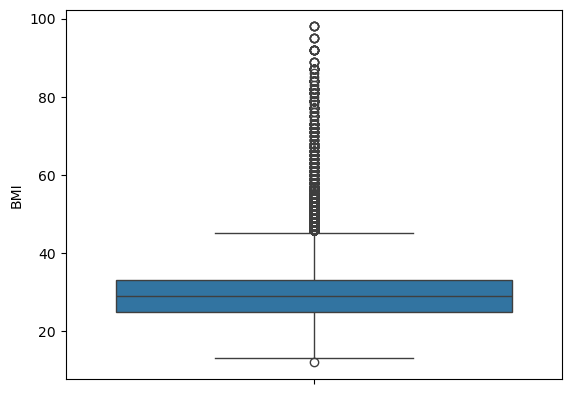

In [ ]:
# 데이터 정제 - box plot을 이용한 이상치 제거 
sns.boxplot(df2['BMI'])
Q1 = df2['BMI'].quantile(0.25)
Q3 = df2['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df3_cleanbmi = df2[(df2['BMI'] >= lower_bound) & (df2['BMI'] <= upper_bound)]

In [ ]:
# 변수 간의 상관관계 파악을 위한 데이터 분할 
X = df2_cleanbmi.drop('Diabetes_binary', axis=1)  # 예: 독립 변수들
y = df2_cleanbmi['Diabetes_binary']  # 종속 변수 (당뇨병 여부)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

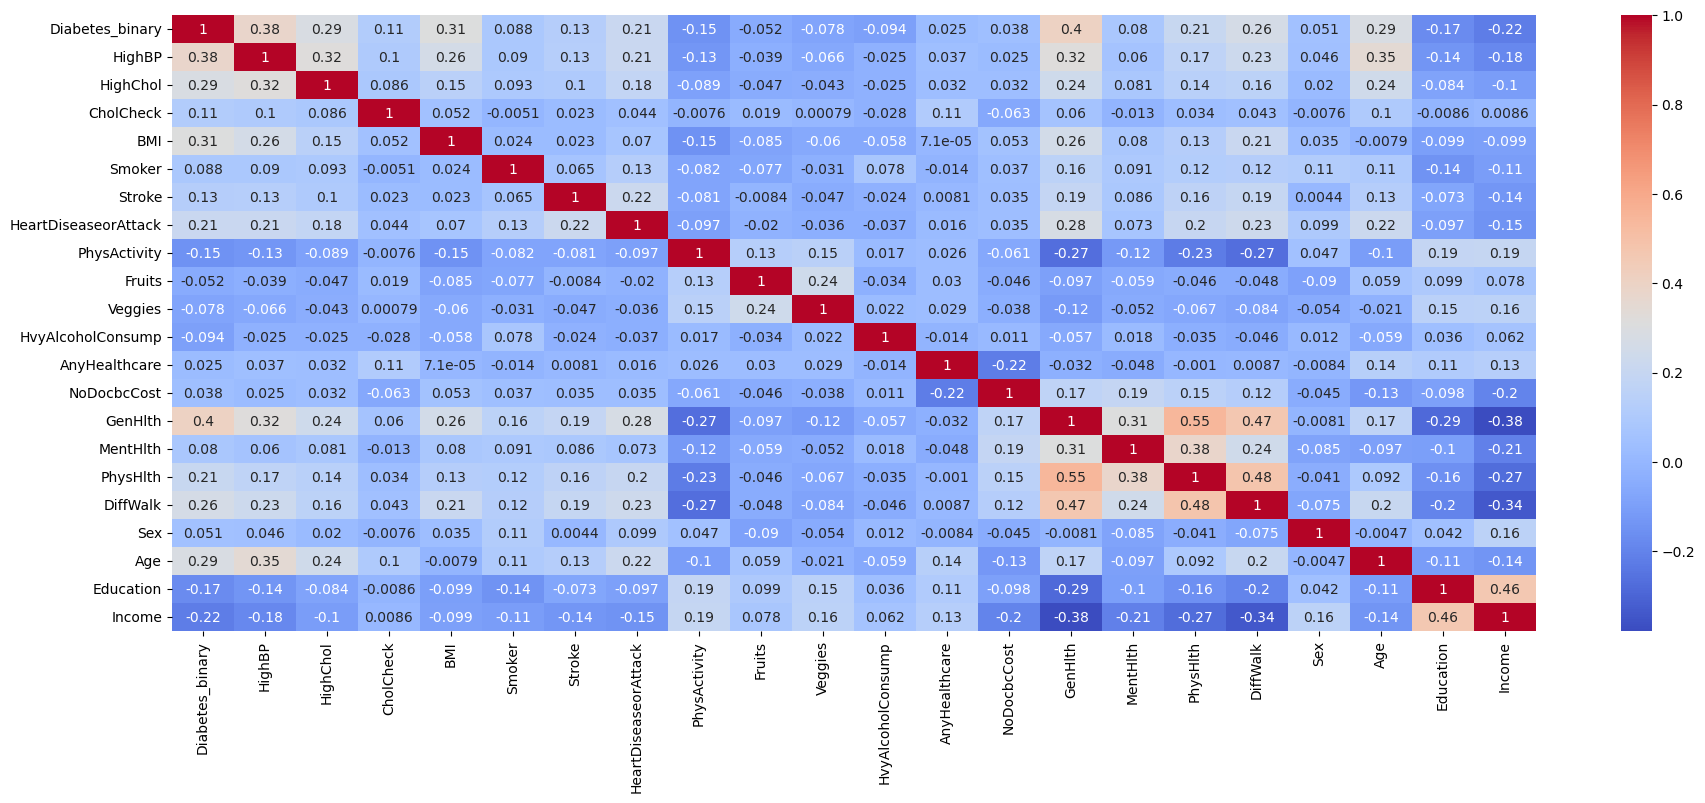

                 Feature       VIF
0                 HighBP  1.364775
1               HighChol  1.181100
2              CholCheck  1.033340
3                    BMI  1.167658
4                 Smoker  1.082848
5                 Stroke  1.094975
6   HeartDiseaseorAttack  1.195185
7           PhysActivity  1.158451
8                 Fruits  1.100842
9                Veggies  1.103369
10     HvyAlcoholConsump  1.022998
11         AnyHealthcare  1.095436
12           NoDocbcCost  1.140555
13               GenHlth  1.876028
14              MentHlth  1.258737
15              PhysHlth  1.685308
16              DiffWalk  1.559485
17                   Sex  1.088891
18                   Age  1.336723
19             Education  1.335740
20                Income  1.541206


In [87]:
# 변수 간의 다중공선성 문제 확인
# 상관관계 히트맵
plt.figure(figsize=(22, 8))
sns.heatmap(df2_cleanbmi.corr(), annot=True, cmap='coolwarm')
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 데이터를 표준화하여 다중공선성 확인 준비
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# VIF 결과 확인
print(vif_data)

In [88]:
# 로지스틱 회귀모형 생성
model = LogisticRegression(max_iter=1000)  # max_iter은 경사 하강법과 같은 최적화 알고리즘이 허용된 최대 반복 횟수
model.fit(X_train, y_train)  # 모델 학습
# 모델 평가
y_pred = model.predict(X_test) # 테스트데이터에 대한 예측값
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100)) # 정확도
print("Confusion Matrix:\n", conf_matrix) # confusion matrix
print("Classification Report:\n", class_report) # 결과 보고서

Accuracy: 74.65%
Confusion Matrix:
 [[5039 1839]
 [1635 5190]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      6878
         1.0       0.74      0.76      0.75      6825

    accuracy                           0.75     13703
   macro avg       0.75      0.75      0.75     13703
weighted avg       0.75      0.75      0.75     13703



클래스가 균등한 df2 자료를 사용하여 로지스틱회귀모형을 구축한 결과  
정확도가 74.62이며, 클래스 0에 대한 정밀도는 0.76, 재현율은 0.76으로 F1스코어는 0.74이다.  
클래스 1에 대한 정밀도는 0.74, 재현율은 0.76으로 F1스코어는 0.75이다.  
이는 클래스가 불균등한 데이터셋과 다르게 클래스0과 클래스1에 대해 모두 준수한 예측 성능을 보여주는 모델임을 확인할 수 있다.

In [89]:
# 로지스틱 회귀모형의 회귀계수 추출 및 파악
coefficients = model.coef_[0] # 회귀 계수 추출
feature_names = X.columns # 변수 이름 추출
for feature, coef in zip(feature_names, coefficients):   # 모델들의 회귀계수 추정결과
    print("{0}: {1}".format(feature, coef))

HighBP: 0.7273813815266216
HighChol: 0.561628224073129
CholCheck: 1.2836668411716856
BMI: 0.09474110665259994
Smoker: 0.0020206332371728733
Stroke: 0.17070818189661335
HeartDiseaseorAttack: 0.2848838188701796
PhysActivity: -0.02625128432307075
Fruits: -0.020688985791700167
Veggies: -0.0731623433972016
HvyAlcoholConsump: -0.7796702212982561
AnyHealthcare: 0.02401223003605817
NoDocbcCost: 0.015359006717746797
GenHlth: 0.5686515116510388
MentHlth: -0.00491073083498062
PhysHlth: -0.006555173460162182
DiffWalk: 0.10644648200029284
Sex: 0.26848959095652075
Age: 0.15776481215155966
Education: -0.032780286254864024
Income: -0.061675086929009394
